In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.signal as signal
import audio2numpy as a2n

In [2]:
x, sr = a2n.audio_from_file('data/yt_1.mp3')
x = x[:,0]
t = np.linspace(0, len(x)/sr, len(x))

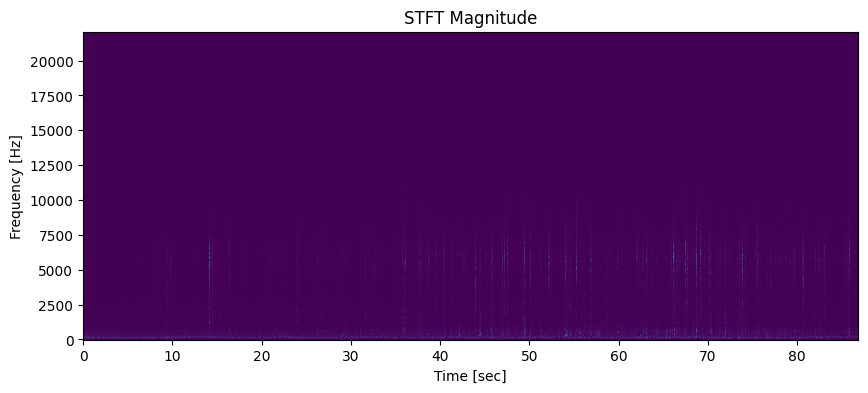

In [3]:
nperseg = 128
stft_f, stft_t, stft_zxx = signal.stft(x, fs=sr, nperseg=1024, noverlap=nperseg)

# show spectrogram
plt.figure(figsize=(10, 4))
plt.pcolormesh(stft_t, stft_f, np.abs(stft_zxx))
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [4]:
f0 = 2000
f1 = 6000

filter_coefs = signal.butter(3, (f0, f1), btype='bandpass', fs=sr, output='sos')
xf = signal.sosfilt(filter_coefs, x)

stft_f_f, stft_t_f, stft_zxx_f = signal.stft(xf, fs=sr, nperseg=nperseg)

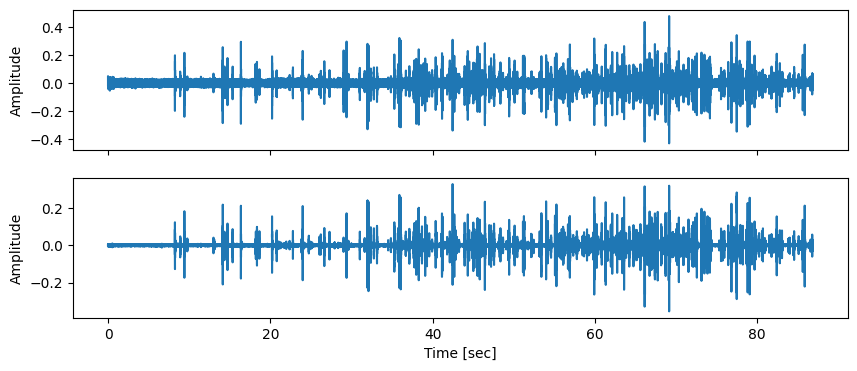

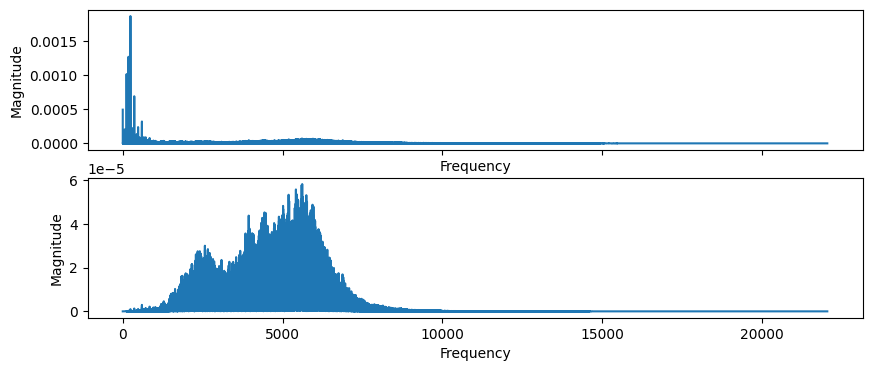

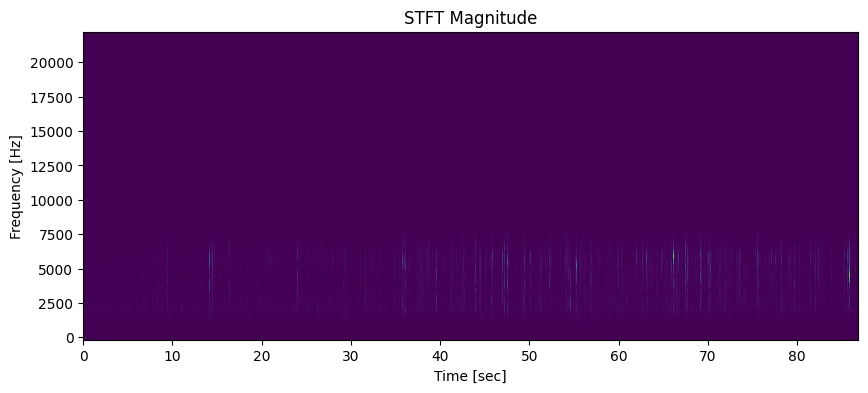

In [5]:
fig, (ax1, ax2) = plt.subplots(figsize=(10, 4), nrows=2, sharex=True)

ax1.plot(t, x)
ax1.set_ylabel('Amplitude')

ax2.plot(t, xf)
ax2.set_ylabel('Amplitude')
ax2.set_xlabel('Time [sec]')

fig, (ax1, ax2) = plt.subplots(figsize=(10, 4), nrows=2, sharex=True)

ax1.magnitude_spectrum(x, Fs=sr)
ax1.set_ylabel('Magnitude')

ax2.magnitude_spectrum(xf, Fs=sr)
ax2.set_ylabel('Magnitude')

fig, ax = plt.subplots(figsize=(10, 4))
ax.pcolormesh(stft_t_f, stft_f_f, np.abs(stft_zxx_f))
ax.set_title('STFT Magnitude')
ax.set_ylabel('Frequency [Hz]')
ax.set_xlabel('Time [sec]')
plt.show()

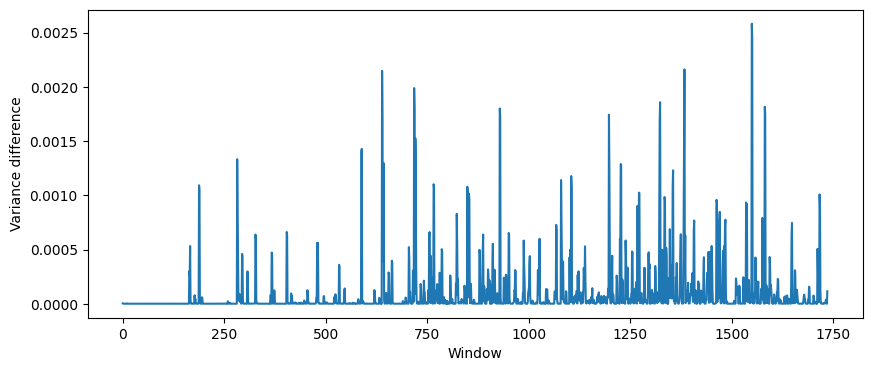

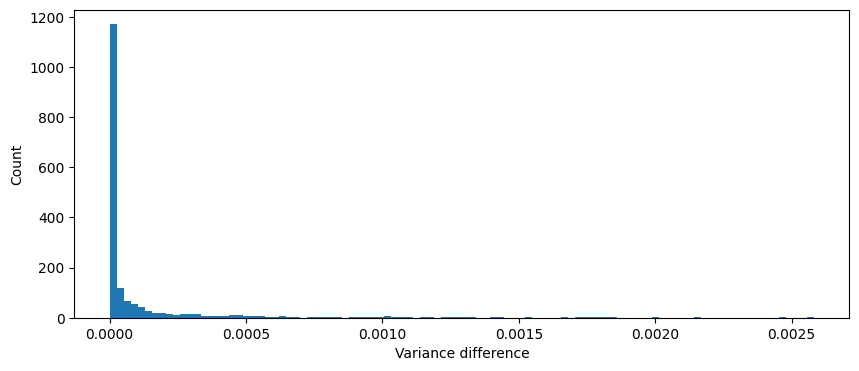

In [6]:
def shift_elements(arr, num, fill_value):
    result = np.empty_like(arr)
    if num > 0:
        result[:num] = fill_value
        result[num:] = arr[:-num]
    elif num < 0:
        result[num:] = fill_value
        result[:num] = arr[-num:]
    else:
        result[:] = arr
    return result

window_len = int(0.05 * sr)
n_windows = int(np.ceil(len(xf) / window_len))
fill_value = 0
xfs = shift_elements(xf, window_len, fill_value)

xfs_subs = np.array_split(xfs, n_windows)
xf_subs = np.array_split(xf, n_windows)

var_diffs = []

for _xf, _xfs in zip(xf_subs, xfs_subs):
    var_diffs.append(np.abs(np.var(_xf) - np.var(_xfs)))

fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(var_diffs)
ax.set_xlabel('Window')
ax.set_ylabel('Variance difference')
plt.show()

# plot distribution of values of var_diff
fig, ax = plt.subplots(figsize=(10, 4))
ax.hist(var_diffs, bins=100)
ax.set_xlabel('Variance difference')
ax.set_ylabel('Count')
plt.show()

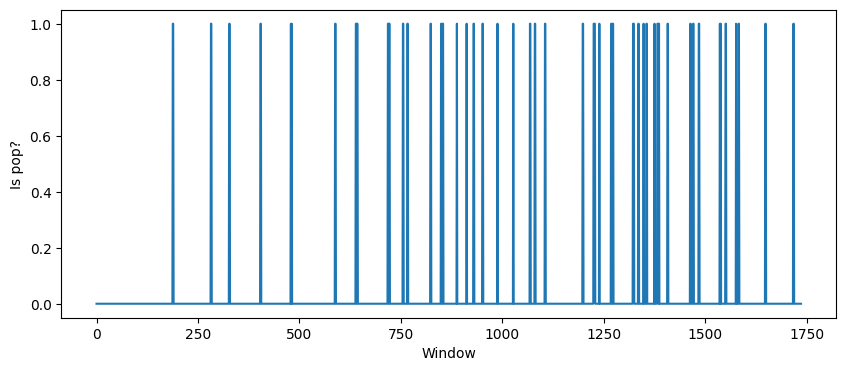

In [7]:
pop_threshold = np.percentile(var_diffs, 95)
is_pop = np.array(var_diffs) > pop_threshold

fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(is_pop)
ax.set_xlabel('Window')
ax.set_ylabel('Is pop?')
plt.show()